In [16]:
# imports
import numpy as np
np.random.seed(1)

import pandas as pd
from tqdm.notebook import tqdm
import time
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from util import gradient_descent

# IEOR 4500. Project 5. Pairs trading

In this project we address the basic elements of the pairs-trading strategy.

## Notation:
$p_i^t$ denotes the (closing) price of asset $i$ at time $t$.

The basic premise is as follows. Suppose that we consider a pair $(i,j)$ of assets. When we invest $S_k$ on this pair, we do the following:

- We take the position $S_k$ in asset $i$.
- We take the position $-S_k$ in asset $j$.

The worth of this position is judged as follows:

- The number of shares in asset $i$ equals $k/p_i^t$.
- The value of the position in asset $i$, at time $t+1$, equals $kp_i^{t+1}/p_i^t$.
- The value of the position in asset $j$, at time $t+1$, equals $-kp_j^{t+1}/p_j^t$.

Hence, if we close the pair position at time $t+1$, the value we accrue (gain or loss) equals
$$kp_i^{t+1}/p_i^t - kp_j^{t+1}/p_j^t.$$

Conceptually, you may have thought, throughout, that $k > 0$, i.e., we are longing $i$ and shorting $j$. However, make sure you understand that the formula is correct if $k < 0$, i.e., we short $i$ and long $j$.

- Denote
$$\Delta_i^t = p_i^{t+1}/p_i^t - p_j^{t+1}/p_j^t,$$
and
$$\bar{\Delta}_{ij} = \frac{1}{T} \sum_{t=0}^{T-1} \Delta_i^t.$$

The optimization problem we want to solve is:

Minimize
$$-\sum_{i<j} x_{ij}\Delta_{ij} + \theta \left( \frac{1}{T-1} \sum_{t=0}^{T-1} (\Delta_i^t - \bar{\Delta}_{ij})^2 \right)$$
(1a)

Subject to
$$-1 \leq x_{ij} \leq 1,$$
for all pairs $i < j$.
(1b)

Here, $\theta \geq 0$ is a risk-tolerance parameter. Your code should work for values of $\theta$ ranging from very small to large, e.g., $0 \leq \theta \leq 10^6$.

1. Implement a first-order method, using projected gradients, for this problem. Yes, you can also attempt to handle it using a solver, but I want to see the first-order implementation.

2. You should test it using the daily data that I have uploaded; Wilshire 5000 and Russell 1000. Using the first data set you should be able to get at least 3000 names with more than 1000 valid data values that are date-aligned.


In [17]:
# reading in data
data_folder = './data'
index_name = 'closeRussell1000'

# stuff that is used as input to the gradient descent function
stuff = dict()
file_endings = ['delta', 'delta_bar', 'delta_centered']
for end in file_endings:
    with open(f'./data/{index_name}_{end}.pkl', 'rb') as f:
        stuff[end] = pickle.load(f)

n, p = stuff['delta'].shape

with open(f'./data/{index_name}_pair_names.pkl', 'rb') as f:
    pair_names = pickle.load(f)

In [18]:
# initial feasible guess
x_0 = np.random.uniform(-1, 1, p)
# utility function parameters
theta, pi = 10, 2

converged, x, hist = gradient_descent(
        x_0=x_0,
        theta=theta, pi=pi, alpha=1e-3, beta=0.9,
        num_iter=1, batch_size=32, tolerance=1e-6,
        **stuff
    )

Iterations: 100%|██████████| 1/1 [00:03<00:00,  3.46s/it]


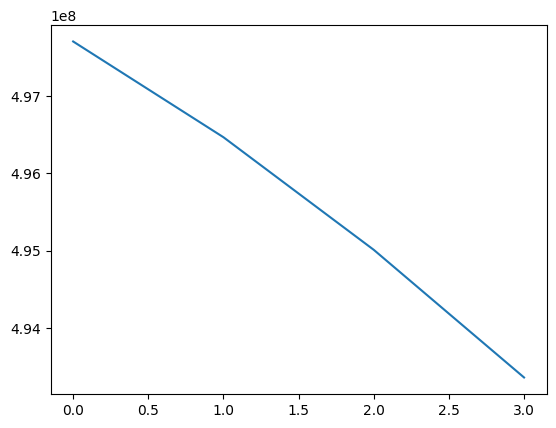

In [19]:
# plotting history, should be going down
plt.plot(hist)

In [20]:
# looking at resulting positions
pd.DataFrame({'pair_names': pair_names, 'position': x})

,pair_names,position
0,AOS-A,-0.165551
1,AAL-A,0.439574
2,AAP-A,-0.997333
3,AAPL-A,-0.394371
4,ABBV-A,-0.704765
...,...,...
459356,ZNGA-ZG,-0.970806
459357,ZTS-ZG,-0.219281
459358,ZNGA-ZION,0.959149
459359,ZTS-ZION,-0.397688
